# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.75
Intercept (b): 1.39
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


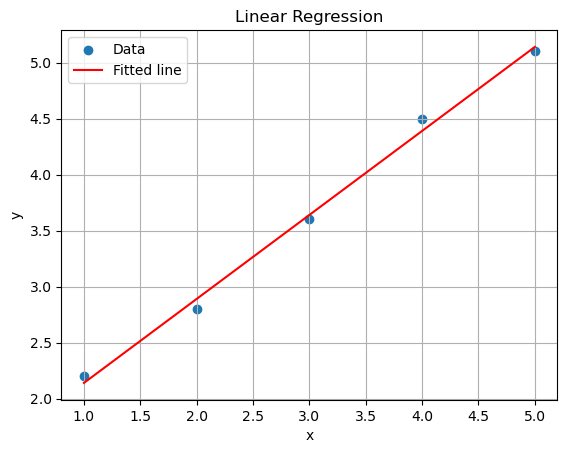

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Slope (m): 4.571
Intercept (b): 47.929
R-squared: 0.991


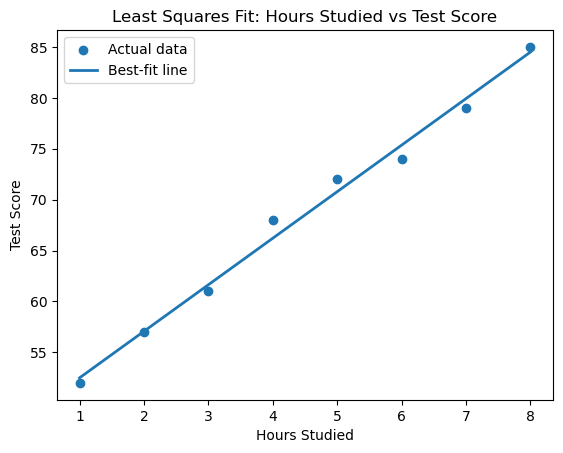

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Make up simple data
# -----------------------------
# Hours studied (x) and Test score (y)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
y = np.array([52, 57, 61, 68, 72, 74, 79, 85], dtype=float)

# -----------------------------
# 2. Calculate the slope (m) and intercept (b)
# -----------------------------
x_mean = x.mean()
y_mean = y.mean()

# Formula for slope (m) and intercept (b)
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean

print("Slope (m):", round(m, 3))
print("Intercept (b):", round(b, 3))

# -----------------------------
# 3. Predict values using y = mx + b
# -----------------------------
y_pred = m * x + b

# -----------------------------
# 4. Measure how well the line fits (R²)
# -----------------------------
rss = np.sum((y - y_pred)**2)     # Residual sum of squares
tss = np.sum((y - y_mean)**2)     # Total sum of squares
r2 = 1 - rss / tss

print("R-squared:", round(r2, 3))

# -----------------------------
# 5. Plot the data and best-fit line
# -----------------------------
plt.scatter(x, y, label="Actual data")
plt.plot(x, y_pred, label="Best-fit line", linewidth=2)
plt.title("Least Squares Fit: Hours Studied vs Test Score")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.legend()
plt.show()



## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


Root found using Bisection Method: 2.0945520401000977


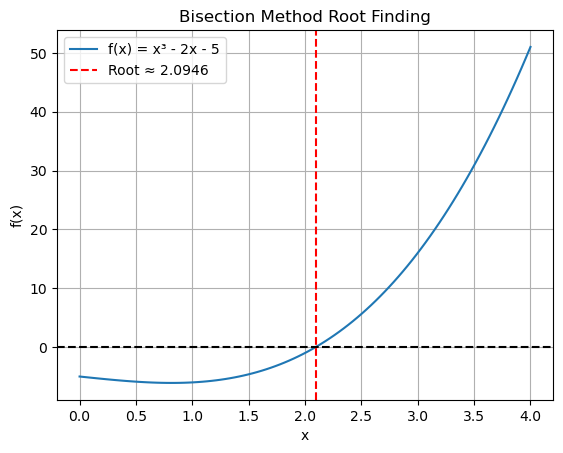

In [9]:
# Complete the Bisection Method implementation
def f(x):
    return x**3 - 2*x - 5


# print("Root found using Bisection Method:", root_bisection)
# Your code to plot the function and the root found
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the function
def f(x):
    return x**3 - 2*x - 5

# Step 2: Choose the interval [a, b] where f(a) and f(b) have opposite signs
a = 1
b = 3
tol = 1e-6  # tolerance (how close we want to get to the root)
max_iter = 50

# Step 3: Apply the Bisection Method
for i in range(max_iter):
    c = (a + b) / 2  # midpoint
    if f(c) == 0 or (b - a) / 2 < tol:
        break  # stop if c is close enough
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

root_bisection = c
print("Root found using Bisection Method:", root_bisection)

# Step 4: Plot the function and the root
x = np.linspace(0, 4, 100)
y = f(x)

plt.plot(x, y, label='f(x) = x³ - 2x - 5')
plt.axhline(0, color='black', linestyle='--')  # x-axis
plt.axvline(root_bisection, color='red', linestyle='--', label=f'Root ≈ {root_bisection:.4f}')
plt.title("Bisection Method Root Finding")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



Root found using Newton-Raphson Method: 2.0945514815423265


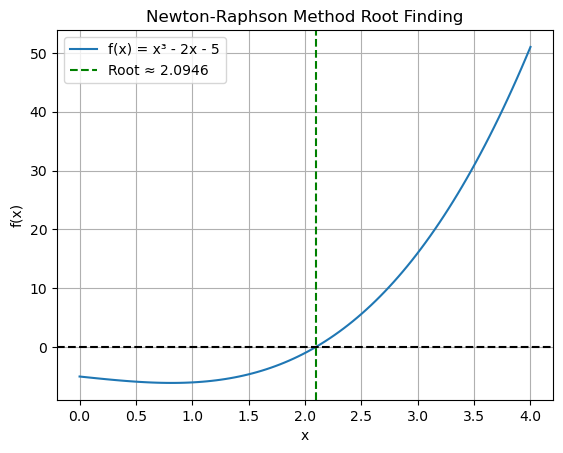

In [10]:
# Complete the Newton-Raphson Method implementation
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2


# print("Root found using Newton-Raphson Method:", root_newton)
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the function and its derivative
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

# Step 2: Choose an initial guess
x0 = 2.0
tol = 1e-6   # tolerance for stopping
max_iter = 50

# Step 3: Apply the Newton-Raphson iteration
for i in range(max_iter):
    x1 = x0 - f(x0)/df(x0)  # main formula
    if abs(x1 - x0) < tol:  # check for convergence
        break
    x0 = x1  # update guess

root_newton = x1
print("Root found using Newton-Raphson Method:", root_newton)

# Step 4: Plot the function and the root
x = np.linspace(0, 4, 100)
y = f(x)

plt.plot(x, y, label='f(x) = x³ - 2x - 5')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(root_newton, color='green', linestyle='--', label=f'Root ≈ {root_newton:.4f}')
plt.title("Newton-Raphson Method Root Finding")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

 Maximum deflection at x = 10.0000 m
 Maximum deflection value y(x) = 0.0001


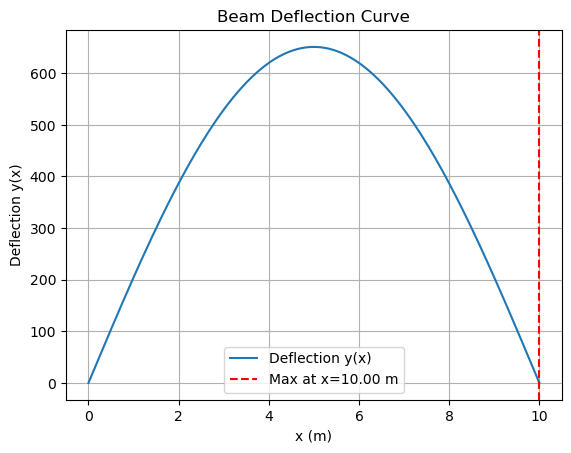

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
L = 10   # beam length (m)
w = 5    # load (kN/m)
EI = 1   # assume EI = 1 for simplicity

# Deflection function (simplified)
def y(x):
    return (w / (24 * EI)) * x * (L**3 - 2*L*x**2 + x**3)

# Derivative of deflection (y'(x))
def dy(x):
    return (w / (24 * EI)) * (L**3 - 6*L*x**2 + 4*x**3)

# Bisection Method
def bisection(f, a, b, tol=1e-6):
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Find root of y'(x) = 0 in [0, L]
x_root = bisection(dy, 0, L)
y_max = y(x_root)

# Print result
print(f" Maximum deflection at x = {x_root:.4f} m")
print(f" Maximum deflection value y(x) = {y_max:.4f}")

# Plot deflection curve
x = np.linspace(0, L, 200)
plt.plot(x, y(x), label='Deflection y(x)')
plt.axvline(x_root, color='red', linestyle='--', label=f'Max at x={x_root:.2f} m')
plt.xlabel('x (m)')
plt.ylabel('Deflection y(x)')
plt.title('Beam Deflection Curve')
plt.legend()
plt.grid(True)
plt.show()